---
# General Floquet Coordinates
---

1. Assuming a general linear map, we start by enforcing symplecticity which leaves us with 3 free parameters.
2. Write down the general linear transfer matrix for Courant-snyder parameters
3. Solve for $\alpha,\beta,\mu$, knowing that $\gamma = (1+\alpha^2)/\beta$
4. We find two solutions, let's keep the one with $\beta>0$

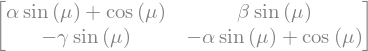

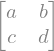

----------------------------------------


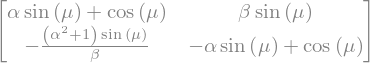

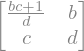

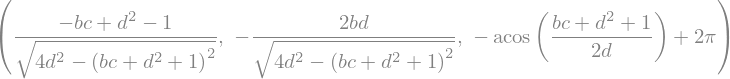

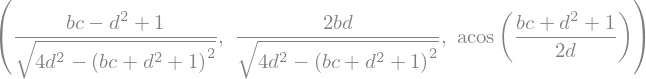

In [32]:
import sympy as sp
sp.init_printing(use_unicode=True,fontsize=24)

a,b,c,d = sp.symbols('a b c d',real=True,positive=True)
alpha, beta, gamma, mu= sp.symbols('alpha beta gamma mu ',real=True,positive=True)
Rot = sp.Matrix([[sp.cos(mu) + alpha*sp.sin(mu), beta*sp.sin(mu)],[-gamma*sp.sin(mu),sp.cos(mu)-alpha*sp.sin(mu)]])
Rot_gen = sp.Matrix([[a,b],[c,d]])

display(Rot,Rot_gen)
print(40*'-')
Rot = Rot.subs({gamma:(1+alpha**2)/beta})
# Rot_gen = Rot_gen.subs({a:(b*c + 1)/d})
Rot_gen = Rot_gen.subs({a:(b*c + 1)/d})
display(Rot,Rot_gen)

sol1,sol2 = sp.solve([Rot[i,j] - Rot_gen[i,j] for i in range(2) for j in range(2)],(alpha,beta,mu))

display(sol1,sol2)

In [33]:
sp.acos(1/2)

In [ ]:

# trace = (bc + d^2 + 1)/d^2





### Invariant

With those known parameters, we can quickly show that the 0th order perturbation theory gives us an invatiant in the form:
$$K_0 = J = \frac{1}{2}\left(\gamma x^2 + 2\alpha x p_x + \beta p_x^2\right)$$

Provided that we choose the following for the 0th order free parameter:
$$C_{0,2} \equiv C_{cs} = \beta/2$$



C.S. parameters
------------------------------------------------------------


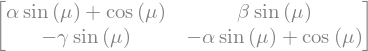

Map
------------------------------------------------------------


Symplectic Map
------------------------------------------------------------


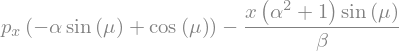

Explicit coefficients
------------------------------------------------------------


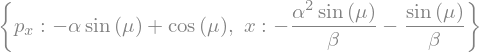

------------------------------------------------------------


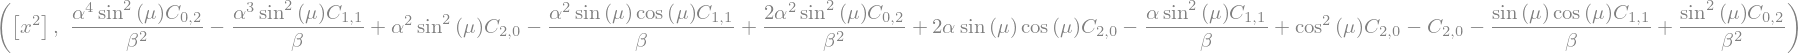

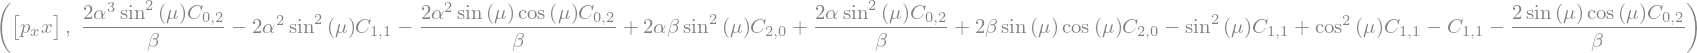

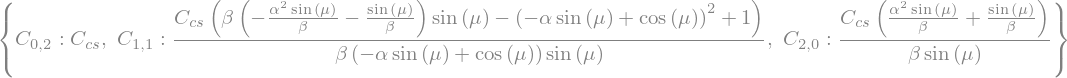

------------------------------------------------------------


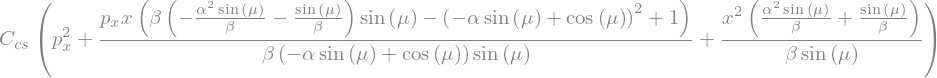

In [10]:
import sympy as sp
sp.init_printing(use_unicode=True,fontsize=24)

import Maps as maps


x,px,alpha, beta, gamma, mu= sp.symbols('x p_x alpha beta gamma mu',real=True)


#=========================
# MAP

Rot = sp.Matrix([[sp.cos(mu) + alpha*sp.sin(mu), beta*sp.sin(mu)],[-gamma*sp.sin(mu),sp.cos(mu)-alpha*sp.sin(mu)]])

xp  = (Rot*sp.Matrix([x,px]))[0]
pxp = (Rot*sp.Matrix([x,px]))[1]

print('C.S. parameters\n' + 60*'-')
display(Rot)

print('Map\n' + 60*'-')
display(xp,pxp)

print('Symplectic Map\n' + 60*'-')
xp  = xp.subs({gamma:(1+alpha**2)/beta})
pxp = pxp.subs({gamma:(1+alpha**2)/beta})
display(xp,pxp)

print('Explicit coefficients\n' + 60*'-')
display(xp.expand().as_coefficients_dict(x,px),pxp.expand().as_coefficients_dict(x,px))
#=========================


general = maps.Map1D(xp,pxp,x,px)
general.solve_C(order = 0,verbose=True,auto_update=True)
display(general.K0.collect(general.C_cs))




# test.jacobian.det().simplify()

### Expanding the invariant:

Recall $$J = \frac{1}{2}\left(\gamma x^2 + 2\alpha x p_x + \beta p_x^2\right)$$

1. $\beta$ appears directly
2. $\gamma = (1+\alpha^2)/\beta$ appears directly
3. We can massage the last terms to show that we indeed get $\alpha$

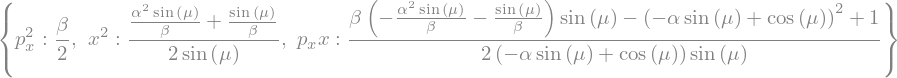

In [14]:
invariant = general.K0.subs({general.C_cs:beta/2}).as_coefficients_dict(x,px)
display(invariant)

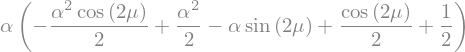

In [18]:
last = invariant[x*px]
num,denum = sp.fraction(last.expand().trigsimp())
display(num,denum)


### Dividing the numerator by alpha, the remaining fraction is 1

In [30]:
display(sp.expand_trig((sp.expand_trig((num/(alpha))).simplify())))
display(sp.expand_trig((denum).expand()))

### which shows what we were looking for.